In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
from Haversine import Haversine
from AntColony import AntColony
from Graph import Graph

In [3]:
df_cities = pd.read_csv('1000_cities.csv', delimiter=';')
df_cities.head()
lat = []
lon = []

for row in df_cities['Coordinates']:
    try:
        lat.append(float(row.split(',')[0]))
        lon.append(float(row.split(',')[1]))
    except:
        lat.append(np.nan)
        lon.append(np.nan)
df_cities['Lat'] = lat
df_cities['Lon'] = lon
df_cities.drop(['Rank','State','Population','Growth From 2000 to 2013'],
              axis=1, inplace=True)

In [20]:
df_cities.head(10)

,City,Coordinates,Lat,Lon
0,South San Francisco,"37.654656, -122.4077498",37.654656,-122.407750
1,Aliso Viejo,"33.5676842, -117.7256083",33.567684,-117.725608
2,Rapid City,"44.0805434, -103.2310149",44.080543,-103.231015
3,Coon Rapids,"45.1732394, -93.3030063",45.173239,-93.303006
4,Malden,"42.4250964, -71.066163",42.425096,-71.066163
5,Noblesville,"40.0455917, -86.0085955",40.045592,-86.008595
6,Delray Beach,"26.4614625, -80.0728201",26.461462,-80.072820
7,Wellington,"26.6617635, -80.2683571",26.661763,-80.268357
8,Florissant,"38.789217, -90.322614",38.789217,-90.322614
9,Youngstown,"41.0997803, -80.6495194",41.099780,-80.649519


In [28]:
df_sample = df_cities.head(100)

In [29]:
graph = Graph(df_sample)

In [30]:
iterat = 100
colony = AntColony(graph, iterations=iterat)

In [31]:
path, cost, time = colony.findShortestPath(graph)

In [32]:
display('It took {} seconds to perform {} iterations'.format(time, iterat))
display('The best possible path is')
display(print(path))
display('The shortest path traveled {:10.3f} Miles'.format(cost))

'It took 36.37607932090759 seconds to perform 100 iterations'

'The best possible path is'

[87, 0, 16, 18, 28, 30, 42, 55, 82, 84, 85, 1, 10, 12, 22, 38, 53, 56, 74, 75, 83, 90, 94, 98, 92, 2, 3, 24, 41, 93, 96, 4, 23, 29, 40, 62, 67, 86, 72, 81, 95, 5, 11, 8, 17, 21, 50, 36, 6, 7, 9, 13, 15, 14, 27, 46, 48, 58, 51, 19, 52, 31, 61, 59, 64, 26, 20, 34, 33, 66, 88, 25, 37, 45, 71, 32, 35, 44, 49, 47, 63, 65, 69, 73, 77, 70, 79, 39, 60, 43, 54, 57, 76, 68, 78, 80, 89, 91, 97]


None

'The shortest path traveled  29643.968 Miles'

In [33]:
df_ordered_cities = df_sample.reindex(path)
df_ordered_cities.insert(0, 'order', range(1, len(df_ordered_cities)+1))
df_ordered_cities.head()

,order,City,Coordinates,Lat,Lon
87,1,Chico,"39.7284944, -121.8374777",39.728494,-121.837478
0,2,South San Francisco,"37.654656, -122.4077498",37.654656,-122.407750
16,3,Folsom,"38.6779591, -121.1760583",38.677959,-121.176058
18,4,Napa,"38.2975381, -122.286865",38.297538,-122.286865
28,5,San Francisco,"37.7749295, -122.4194155",37.774929,-122.419415


No handles with labels found to put in legend.


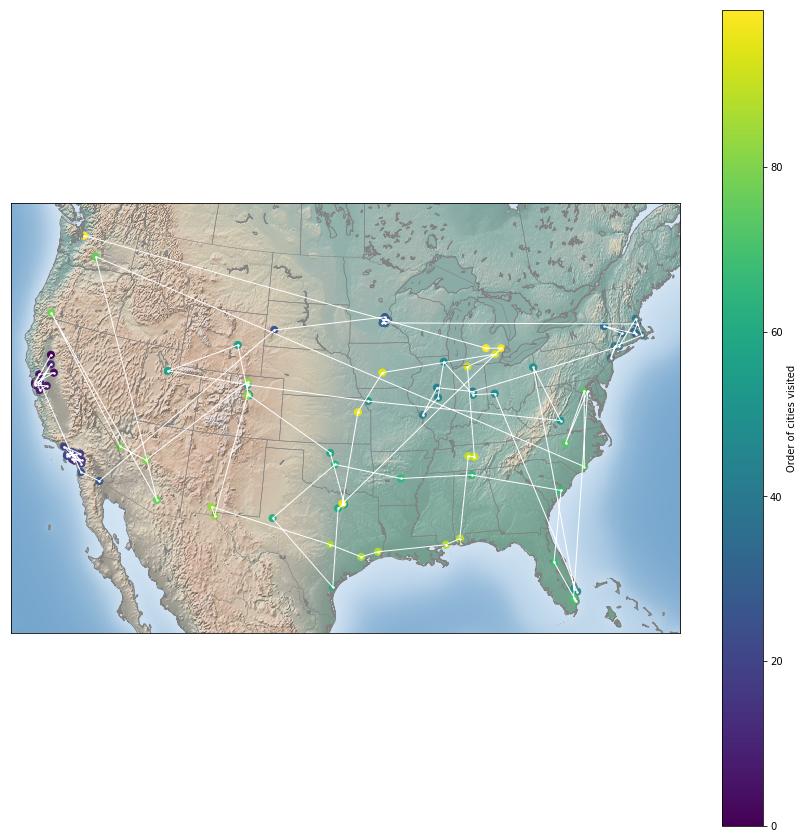

In [38]:
# create a color map for matplotlib
cmap = cm.get_cmap('GnBu')


margin = 5
lats = df_ordered_cities.Lat.values
lons = df_ordered_cities.Lon.values
order = df_ordered_cities.order.values

fig = plt.figure(figsize=(15,15))
m = Basemap(projection='lcc', resolution='i', 
            llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            lat_1=33,lat_2=45,lon_0=-95)

x, y = m(lons, lats)
m.plot(x, y, 'o-', markersize=1.5, linewidth=1,color='w')


m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lons, lats,latlon=True, s = 50,
          c=order)

# 3. create colorbar and legend
plt.colorbar(label='Order of cities visited')
plt.clim(0, len(order))

plt.savefig('100_cities.png')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [37]:
plt.savefig('100_cities.png')

<Figure size 432x288 with 0 Axes>